# Time Series EDA

## Exercise
Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

## Imports

In [1]:
# standart imports
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

# my imports
import prepare as p

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# sklearn
from sklearn.model_selection import TimeSeriesSplit

# plotting defaults
plt.rc('figure', figsize=(10, 5))
plt.rc('font', size=12)

**For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.**

In [2]:
#load my ts superstore csv
df = pd.read_csv('ts_superstore.csv', index_col=0)

In [3]:
df

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,50,63,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,4.744592e+10,4.744592e+10,8503 NW Military Hwy,San Antonio,10,TX,78231
912996,50,59,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,4.744592e+10,4.744592e+10,8503 NW Military Hwy,San Antonio,10,TX,78231
912997,50,74,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,4.744592e+10,4.744592e+10,8503 NW Military Hwy,San Antonio,10,TX,78231
912998,50,62,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,4.744592e+10,4.744592e+10,8503 NW Military Hwy,San Antonio,10,TX,78231


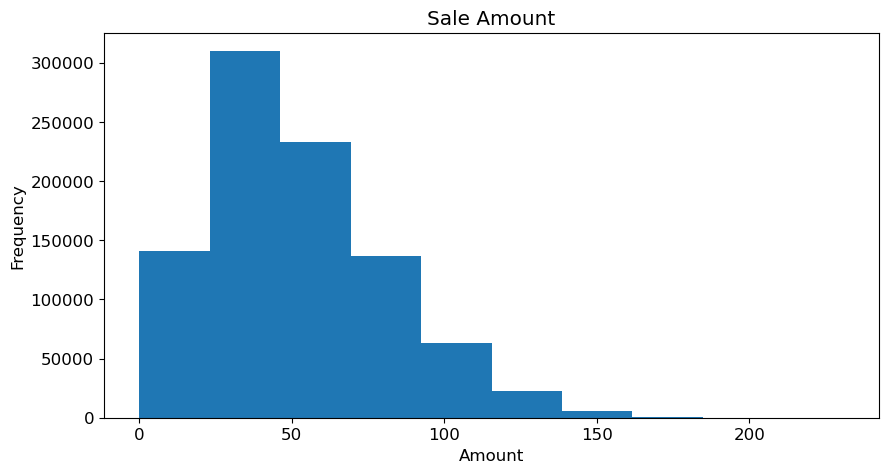

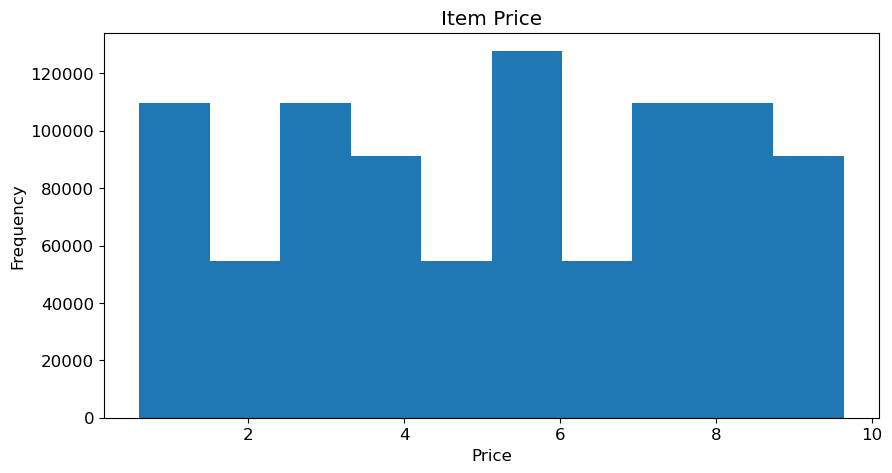

In [4]:
df = p.prep_superstore_data(df)

In [5]:
df.sales_total.value_counts()

41.76      1534
16.80      1489
12.60      1346
52.20      1208
80.19      1145
           ... 
1435.90       1
1885.77       1
1415.10       1
713.74        1
1206.15       1
Name: sales_total, Length: 5332, dtype: int64

In [6]:
# tss = TimeSeriesSplit(n_splits=2)
# train_splits, test_splits = tss.split(df)
# # train_split = train_splits[1]
# # test_split = test_splits[1]

# print("Train Split:", train_split)
# print("Test Split:", test_split)

# train_splits

# test_splits

# min_date = df.sale_date.min()
# max_date = df.sale_date.max()
# print("Min:", min_date, "Max:", max_date)

# plt.plot(train_split.sales_total)
# plt.plot(test_split.sales_total)
# plt.title('Superstore total sale over time')
# plt.show()

## Percentage-Based

In [7]:
train_size = 0.70 
n = df.shape[0] 
test_start_index = round(train_size * n)

In [8]:
train = df.iloc[:test_start_index] 
test = df.iloc[test_start_index:] 

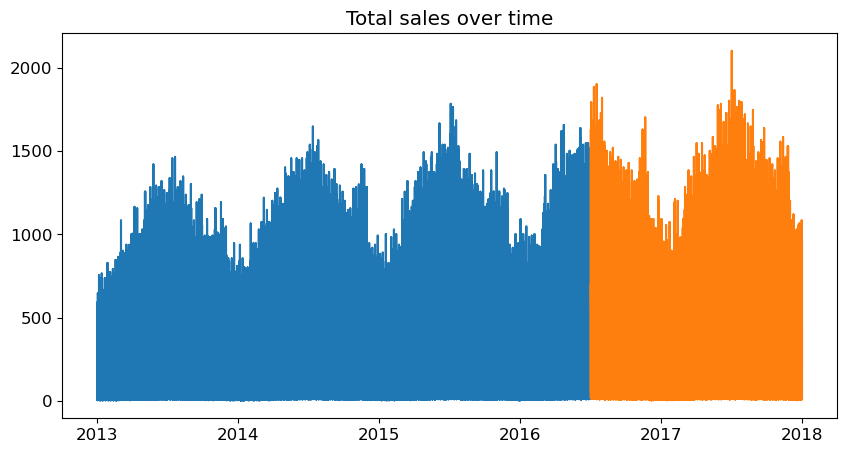

In [9]:
plt.plot(train.sales_total)
plt.plot(test.sales_total)
plt.title('Total sales over time')
plt.show()

##  Blow off the time series

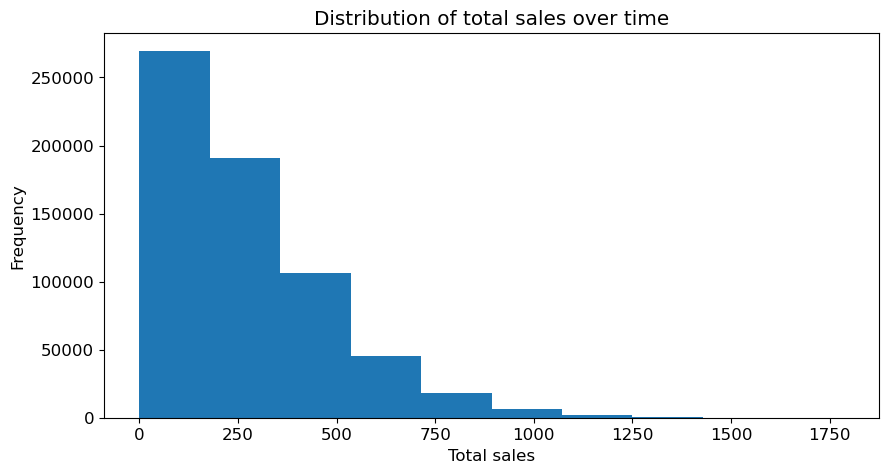

In [10]:
train.sales_total.plot.hist()
plt.title('Distribution of total sales over time')
plt.ylabel('Frequency')
plt.xlabel('Total sales')
plt.show()

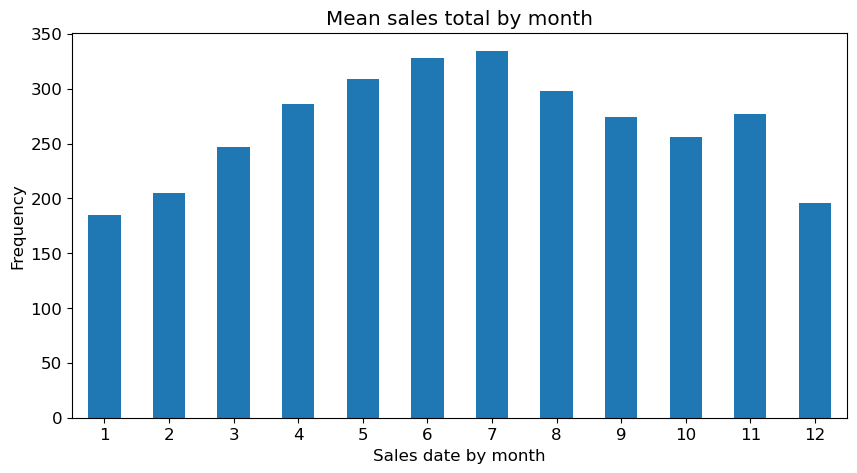

In [11]:
train.groupby(train.index.month).sales_total.mean()\
.plot.bar().tick_params('x', rotation=0)

plt.title('Mean sales total by month')
plt.ylabel('Frequency')
plt.xlabel('Sales date by month')
plt.show()

In [12]:
# assign a weekday column from the day_name() method on the datetime index
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week

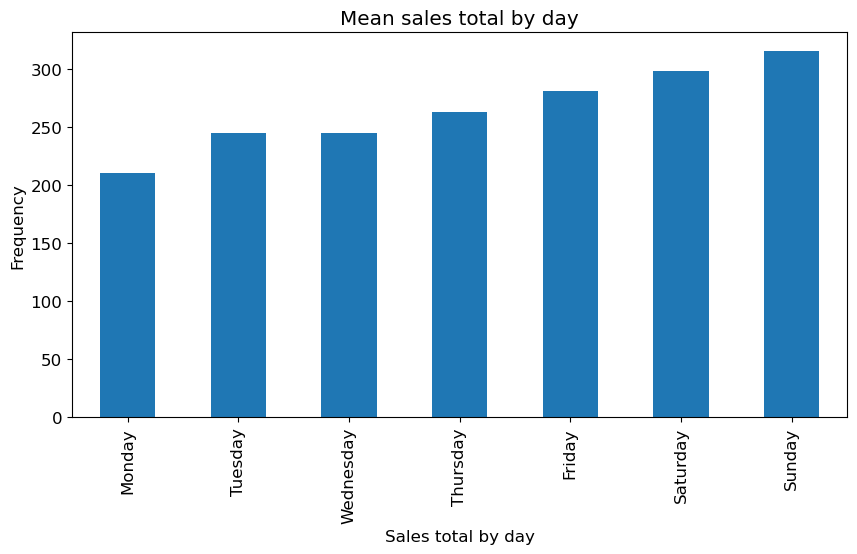

In [13]:
# aggregate on that weekday
train.groupby('weekday').mean().sort_values('day_num').sales_total.plot.bar()

plt.title('Mean sales total by day')
plt.ylabel('Frequency')
plt.xlabel('Sales total by day')
plt.show()

# Open Power System

In [14]:
#load my open power system csv
df_ops = pd.read_csv('open_power_sys.csv', index_col=0)

In [15]:
df_ops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2+ KB


In [26]:
df_ops.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


consumption


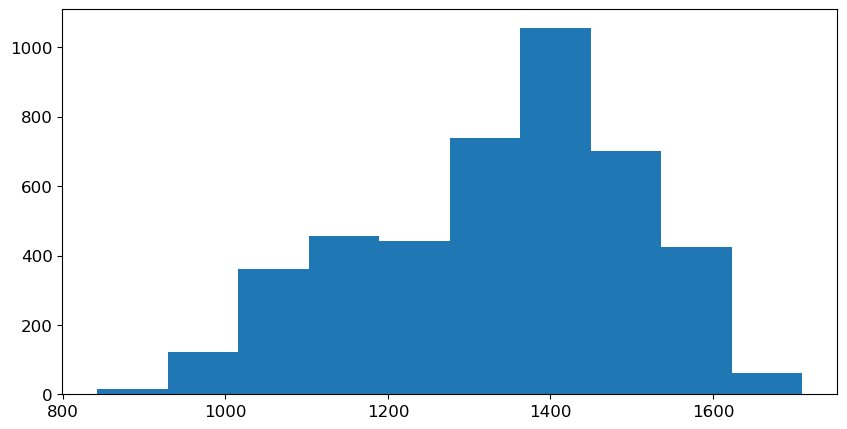

wind


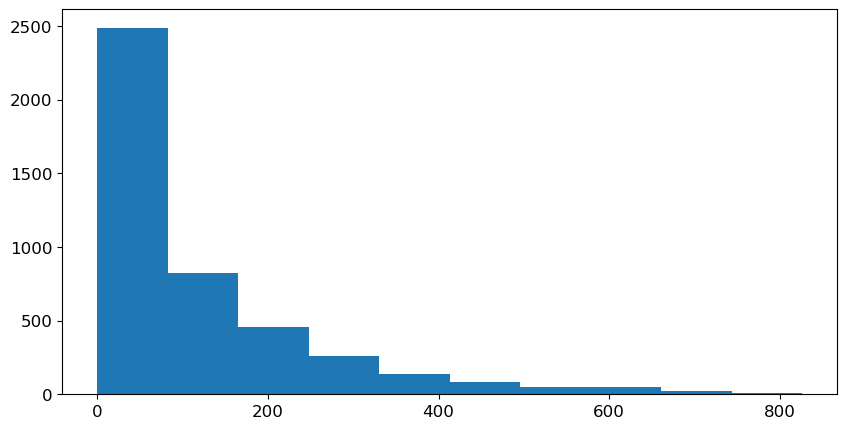

solar


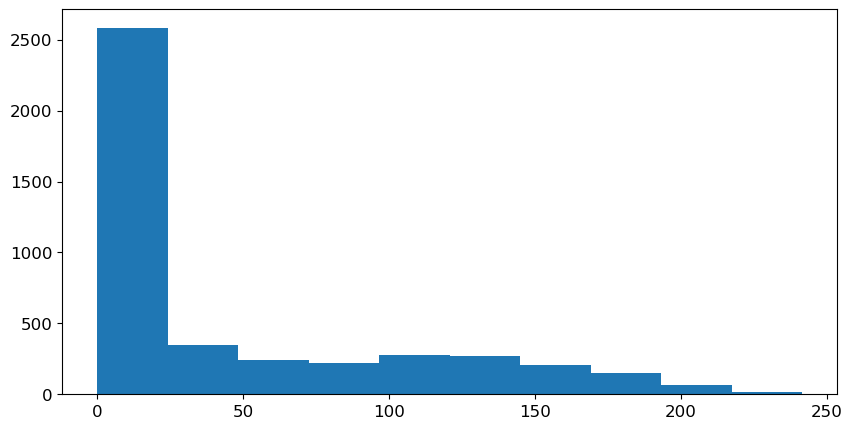

wind+solar


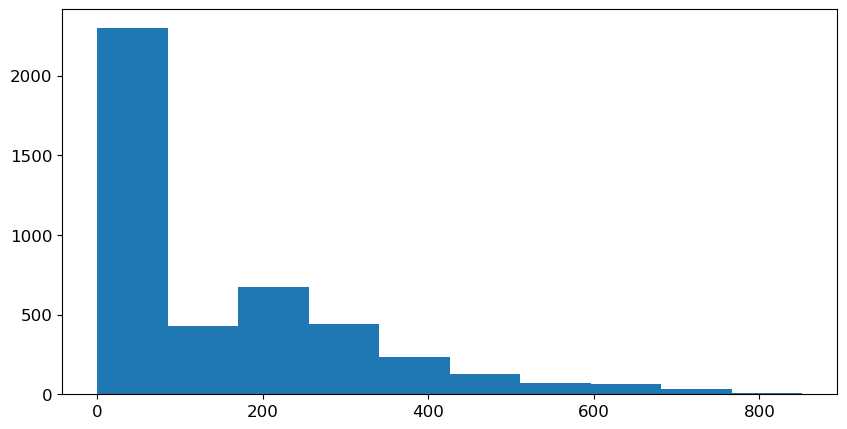

month


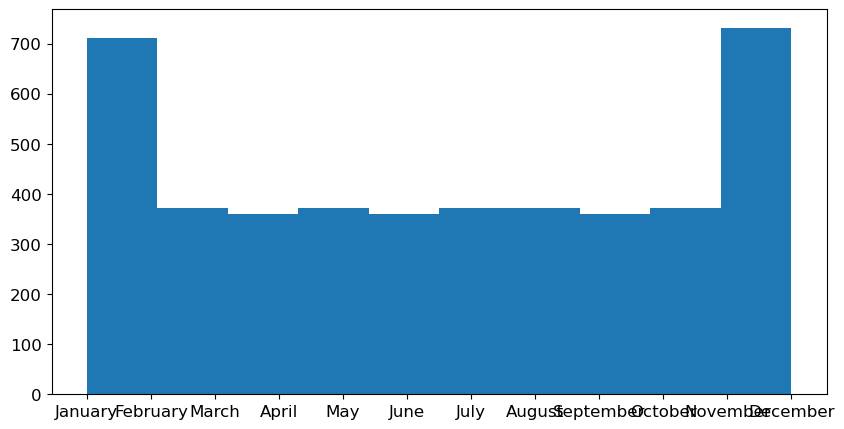

year


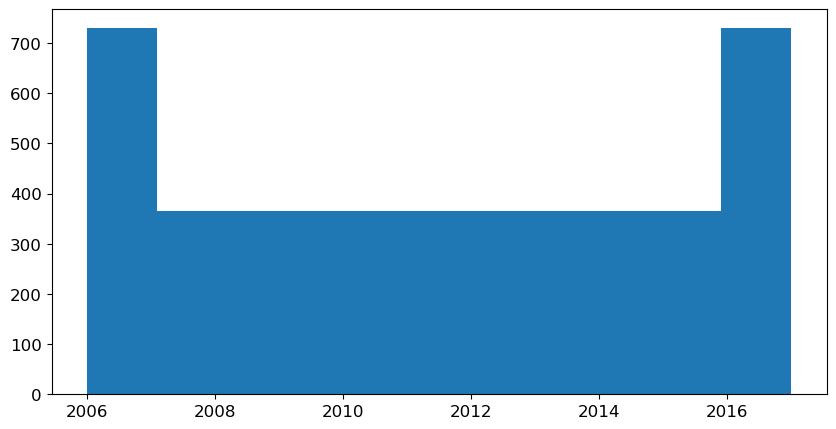

In [16]:
df_ops = p.prep_ops_data(df_ops)

# Human-Based

In [17]:
train_ops = df_ops.loc[:'2014']
test_ops = df_ops.loc['2015':]

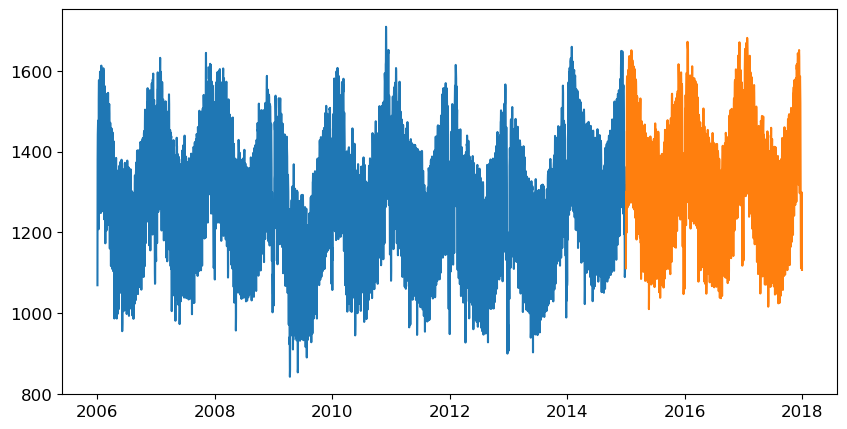

In [18]:
plt.plot(train_ops.index, train_ops.consumption)
plt.plot(test_ops.index, test_ops.consumption)
plt.show()

## Seasonal Plot

In [19]:
y = train_ops.consumption

In [20]:
y.groupby([y.index.year, y.index.month]).mean()[:6]

date  date
2006  1       1461.442065
      2       1467.106893
      3       1418.649161
      4       1275.058900
      5       1253.488484
      6       1241.781667
Name: consumption, dtype: float64

In [21]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1332.490710,1303.712233,1348.810258,1274.170968,1347.642400,1377.754355,1432.526667,1412.856161


In [22]:
# In this case, we turn the 0 index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

date,2006,2007,2008,2009,2010,2011,2012,2013,2014
date,,,,,,,,,
1,1461.442065,1467.058032,1470.373484,1362.255613,1400.041677,1416.290581,1351.441226,1321.194935,1483.261323
2,1467.106893,1434.484357,1468.486207,1392.155179,1447.322536,1436.212607,1426.666241,1354.087429,1496.465536
3,1418.649161,1400.909871,1398.653258,1309.222387,1383.865226,1366.989516,1294.748258,1281.671581,1416.458355
4,1275.058900,1280.133167,1378.243233,1157.006367,1261.505467,1300.732300,1264.427000,1262.359967,1357.582700
5,1253.488484,1265.436000,1254.194226,1147.650742,1242.220129,1311.608290,1239.388710,1192.123032,1332.490710
6,1241.781667,1290.828733,1286.797100,1166.456833,1247.938433,1254.294333,1222.315667,1181.999000,1303.712233
7,1253.296290,1281.134258,1282.866355,1164.515871,1263.467452,1248.768194,1212.953710,1211.503484,1348.810258
8,1241.188774,1284.554355,1269.323484,1156.114645,1245.832323,1229.204935,1208.466258,1213.691355,1274.170968
9,1311.169933,1347.857500,1339.615433,1250.585967,1324.003533,1300.706833,1254.097633,1262.723900,1347.642400


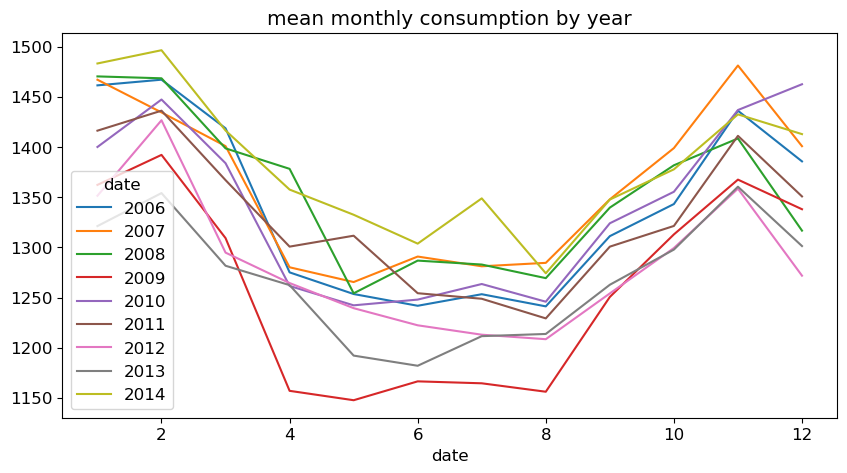

In [23]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly consumption by year')
plt.show()

## Seasonal Subseries PLOT

In [24]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1332.490710,1303.712233,1348.810258,1274.170968,1347.642400,1377.754355,1432.526667,1412.856161


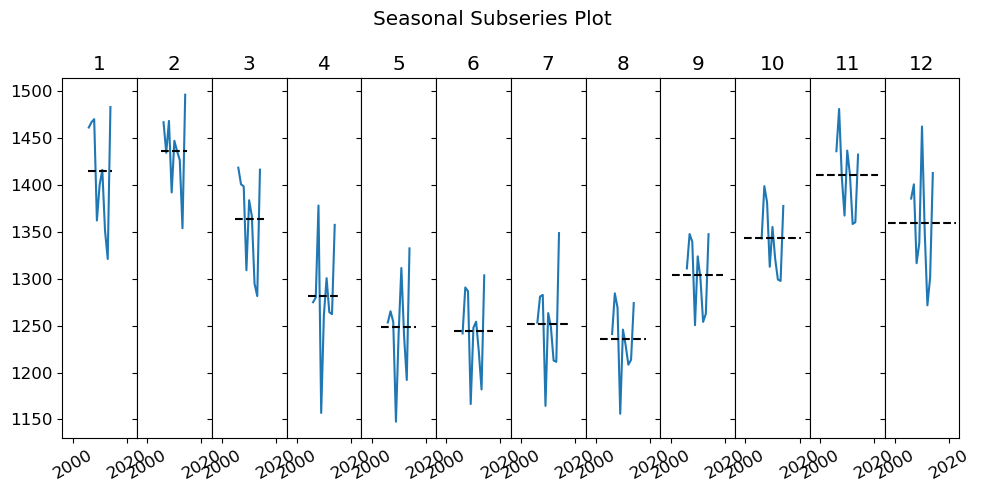

In [25]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)